# Final Project 3

For my project, I hope to predict the sale price of homes, using the features of each property.

The dataset is the Ames Housing dataset, available on Kaggle. The training set consists of 1460 observations, with 79 features.

Below is the exploratory data analysis of the dataset's features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("housepricestrain.csv")

In [3]:
# helper functions

def frequency_count(variable_dict, variable_name):
    counts = data[variable_name].value_counts()
    new_dict = {variable_dict[i]: counts.loc[i] for i in counts.index}
    new_df = pd.DataFrame({"Number":list(new_dict.values())}, index = new_dict.keys())
    return new_df.sort_values(by = "Number", ascending = False)

def mean_sale_prices(variable_dict, variable_name):
    means = data.groupby(variable_name)["SalePrice"].mean()
    new_index = []
    mean_sale_prices = []
    for i in means.index:
        new_index.append(variable_dict[i])
        mean_sale_prices.append(means.loc[i])
    new_df_mean_sale_prices = pd.DataFrame({"Mean Sale Price":mean_sale_prices}, index = new_index)
    return new_df_mean_sale_prices.sort_values(by="Mean Sale Price", ascending = False)

## Overview of dataset

The training set consists of 1460 observations, each representing a home sold in Ames, Iowa, in the period from 2006 through 2010. In addition to an ID number for each home and the target (SalePrice), there are 79 features, each describing some aspect of the home (e.g., lot size, number of rooms, year of construction, etc.).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Target (SalePrice)

As noted above, my final project aims to build a model that predicts the sale price of homes. So I thought that I would start by exploring and visualizing the sale price values in the training set.

The average sale price is 180K. However, as the histogram below shows, the distribution of sale prices is right-skewed, with a number of homes selling for considerably more than the median sale price of 163K.

In [8]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11753a240>]], dtype=object)

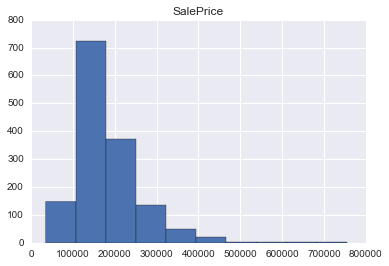

In [9]:
data.hist("SalePrice")

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


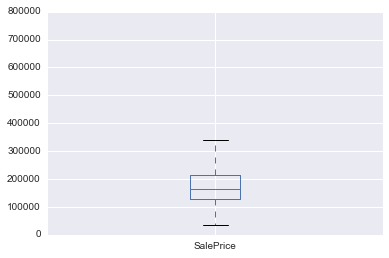

In [10]:
data.boxplot("SalePrice");

# Highly Correlated Independent Variables

With 79 features, it's hard to know where to start. I decided to begin by looking at the features that are most strongly correlated with the target (SalePrice).

In [11]:
correlations = data.corr()
correlations.loc["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### There are 10 features with a correlation coefficient of at least 0.5 with respect to the target (Sale Price). So, let's start by looking at these features:

* OverallQual      (0.790982)
* GrLivArea        (0.708624)
* GarageCars       (0.640409)
* GarageArea       (0.623431)
* TotalBsmtSF      (0.613581)
* 1stFlrSF         (0.605852)
* FullBath         (0.560664)
* TotRmsAbvGrd     (0.533723)
* YearBuilt        (0.522897)
* YearRemodAdd     (0.507101)

To be sure, some of these features are also highly correlated with each other. For example, as the correlation matrix below shows, GarageCars (which measures how many cars fit in a home's garage) is highly correlated with GarageArea (which measures the square footage of a home's garage). Not surprisingly, the larger the garage, the more cars it can fit.

In [12]:
top_10_cols = ["GarageCars","GarageArea", "GrLivArea","TotalBsmtSF","1stFlrSF","TotRmsAbvGrd",\
               "OverallQual","YearBuilt","YearRemodAdd"]
top_10 = data[top_10_cols]
top_10.corr()

,GarageCars,GarageArea,GrLivArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd
GarageCars,1.000000,0.882475,0.467247,0.434585,0.439317,0.362289,0.600671,0.537850,0.420622
GarageArea,0.882475,1.000000,0.468997,0.486665,0.489782,0.337822,0.562022,0.478954,0.371600
GrLivArea,0.467247,0.468997,1.000000,0.454868,0.566024,0.825489,0.593007,0.199010,0.287389
TotalBsmtSF,0.434585,0.486665,0.454868,1.000000,0.819530,0.285573,0.537808,0.391452,0.291066
1stFlrSF,0.439317,0.489782,0.566024,0.819530,1.000000,0.409516,0.476224,0.281986,0.240379
TotRmsAbvGrd,0.362289,0.337822,0.825489,0.285573,0.409516,1.000000,0.427452,0.095589,0.191740
OverallQual,0.600671,0.562022,0.593007,0.537808,0.476224,0.427452,1.000000,0.572323,0.550684
YearBuilt,0.537850,0.478954,0.199010,0.391452,0.281986,0.095589,0.572323,1.000000,0.592855
YearRemodAdd,0.420622,0.371600,0.287389,0.291066,0.240379,0.191740,0.550684,0.592855,1.000000


### However, as a starting point for EDA, I'd like to begin with the 10 features that most strongly correlate with the target, SalePrice.

## 1. OverallQual

OverallQual is a categorical variable representing the rating of the overall material and finish of the house. Values range from 1 to 10, with 1 being "very poor" and 10 being "very excellent". As noted above, OverallQual is the feature that most strongly correlates with SalePrice.

The distribution of OverallQual scores is normal, and not surprisingly, the overall material and finish most homes in the training set are rated as average.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e5a710>]], dtype=object)

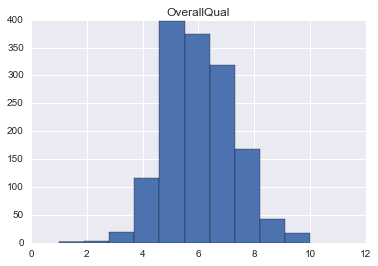

In [13]:
# OverallQual: Rates the overall material and finish of the house, int
data.hist("OverallQual")

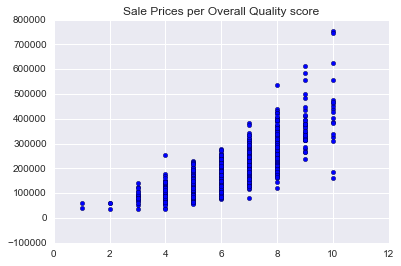

In [14]:
plt.scatter(data["OverallQual"], data["SalePrice"])
plt.title("Sale Prices per Overall Quality score");

### Although most OverallQual tiers show a wide range of sale prices, there is also a generally upward trend. As the tier increases, so do the sale prices.

## 2. GrLivArea

GrLivArea is a numeric variable representing the above grade (ground) living area of a home in square feet. This variable correlates strongly with SalePrice, which is consistent with common sense--most people would expect a home with more living area to sell for more than a home with less living area, all else equal.

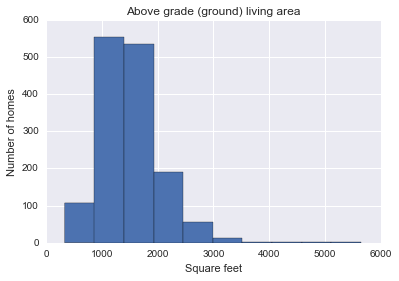

In [15]:
# Feature 46, GrLivArea: Above grade (ground) living area square feet
plt.hist(data["GrLivArea"])
plt.title("Above grade (ground) living area")
plt.xlabel("Square feet")
plt.ylabel("Number of homes");

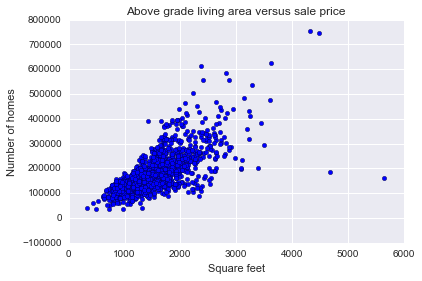

In [16]:
plt.scatter(data.GrLivArea, data.SalePrice)
plt.title("Above grade living area versus sale price")
plt.xlabel("Square feet")
plt.ylabel("Number of homes");

### Not surprisingly, houses with more living area tend to sell for higher prices.

## 3. GarageCars

GarageCars is a numeric variable indicating the car capacity of the home. Most homes in the training set have a two-car garage.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a405198>]], dtype=object)

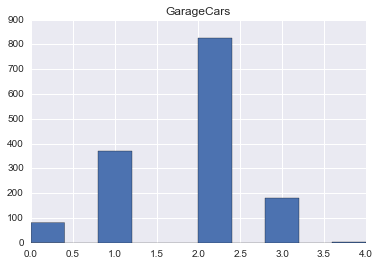

In [17]:
# GarageCars: Size of garage in car capacity
data.hist("GarageCars")

In [18]:
print("Mean sale price of homes, grouped by garage car capacity")
cars = data.groupby("GarageCars")
cars["SalePrice"].mean()

Mean sale price of homes, grouped by garage car capacity


GarageCars
0    103317
1    128116
2    183851
3    309636
4    192655
Name: SalePrice, dtype: int64

### The mean sale price increases until a home's garage car capacity reaches 3. But apparently making room for a 4th car decreases the mean sale price.

## 4. GarageArea

GarageArea is a numeric variable measuring the size of a home's garage in square feet.

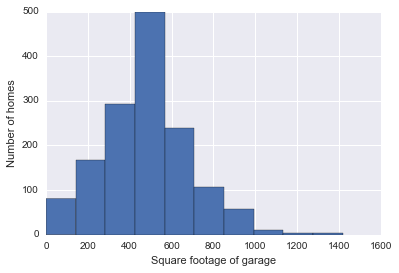

In [19]:
plt.hist(data.GarageArea)
plt.ylabel("Number of homes")
plt.xlabel("Square footage of garage")

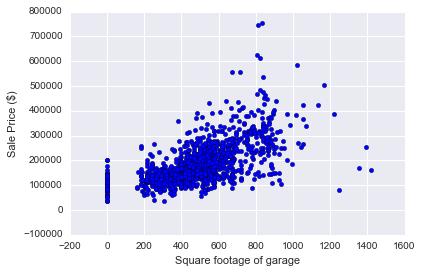

In [20]:
# GarageArea: Size of garage in square feet
plt.scatter(data.GarageArea, data.SalePrice)
plt.ylabel("Sale Price ($)")
plt.xlabel("Square footage of garage")

## 5. TotalBsmtSF

TotalBsmtSF is a numeric variable measuring the total square feet of a home's basement area. Although, as shown below, there are a number of features in the dataset describing aspects of a home's basement, this is the basement-related feature that is most strongly correlated with the sale price.

Furthermore, as the above correlation table shows, TotalBsmtSF is highly correlated with 1stFlSF, which measures the square footage of a home's first floor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a53fd68>]], dtype=object)

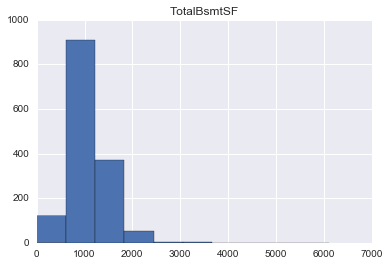

In [21]:
# TotalBsmtSF: Total square feet of basement area
data.hist("TotalBsmtSF")

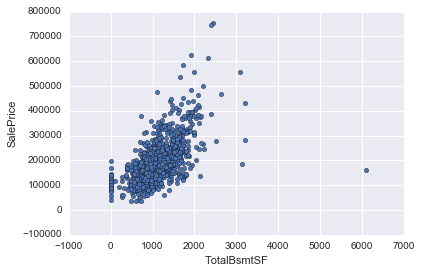

In [22]:
data.plot.scatter(x = "TotalBsmtSF", y = "SalePrice")

## 6. 1stFlrSF

1stFlrSF is a numeric variable measuring the first floor square feet of a home. As noted above, it is highly correlated with both SalePrice and total basement square footage.

I think most people would expect this to be an important variable, as larger homes frequently sell for more than smaller homes, all else equal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a6d1a90>]], dtype=object)

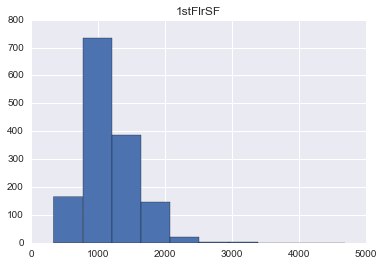

In [23]:
# 1stFlrSF: First Floor square feet
data.hist("1stFlrSF")

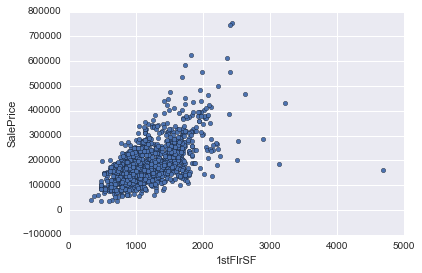

In [24]:
data.plot.scatter(x = "1stFlrSF", y = "SalePrice")

### The sale price of a home is positively correlated with it first floor square footage. However, the scatter plot also shows some notable outliers.

## 7. FullBath

FullBath is a numeric variable measuring the number of full bathrooms above grade in a home. As noted above, this feature correlates highly with SalePrice, which makes sense, as many homebuyers would care strongly about the number of bathrooms in a house.

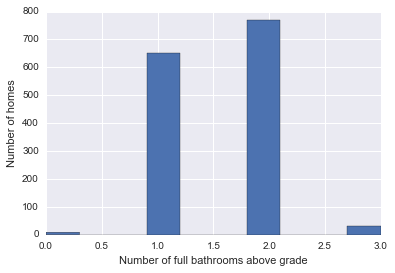

In [25]:
# FullBath: Full bathrooms above grade
plt.hist(data["FullBath"])
plt.xlabel("Number of full bathrooms above grade")
plt.ylabel("Number of homes")

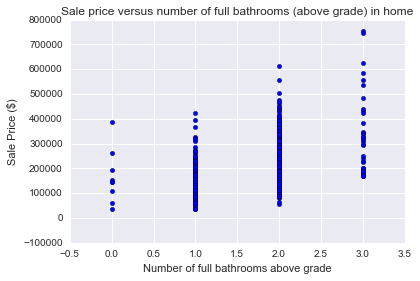

In [26]:
plt.scatter(data.FullBath, data.SalePrice)
plt.title("Sale price versus number of full bathrooms (above grade) in home")
plt.xlabel("Number of full bathrooms above grade")
plt.ylabel("Sale Price ($)")

In [27]:
print("Mean sale price, grouped by number of full bathrooms above grade")
data.groupby("FullBath").SalePrice.mean()

Mean sale price, grouped by number of full bathrooms above grade


FullBath
0    165200
1    134751
2    213009
3    347822
Name: SalePrice, dtype: int64

### Each tier shows considerable variance in sale prices, although there is a general upward trend as the number of bathrooms increase. Moreover, we see that mean sale prices  rise as the number of full bathrooms in a home increases. 

## 8. TotRmsAbvGrd

TotRmsAbvGrd is a numeric variable representing the total rooms (excluding bathrooms) in a home that are above grade.

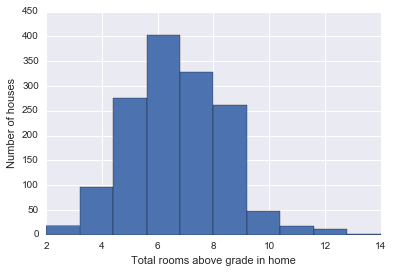

In [28]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
plt.hist(data.TotRmsAbvGrd)
plt.xlabel("Total rooms above grade in home")
plt.ylabel("Number of houses")

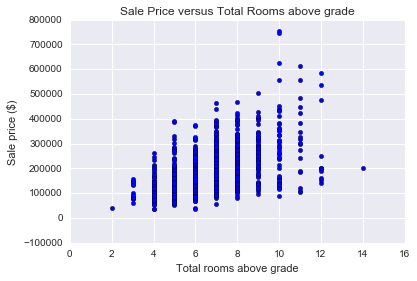

In [29]:
plt.scatter(data.TotRmsAbvGrd, data.SalePrice)
plt.title("Sale Price versus Total Rooms above grade")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale price ($)")

In [30]:
print("Mean sale price, grouped by total rooms above grade")
totalRooms = data.groupby("TotRmsAbvGrd")
totalRooms["SalePrice"].mean()

Mean sale price, grouped by total rooms above grade


TotRmsAbvGrd
2      39300
3     111217
4     122844
5     141550
6     161303
7     196666
8     213427
9     252988
10    296279
11    318022
12    280971
14    200000
Name: SalePrice, dtype: int64

## 9. YearBuilt

YearBuilt represents the original construction date of the home. The largest category of homes are those built in 2000 or later, presumably reflecting the housing boom in those years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aceda20>]], dtype=object)

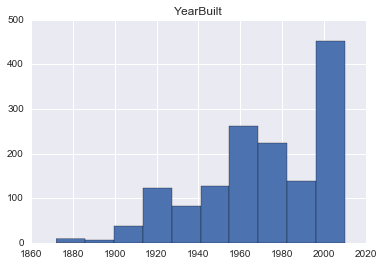

In [31]:
# YearBuilt: Original construction date, int
data.hist("YearBuilt")

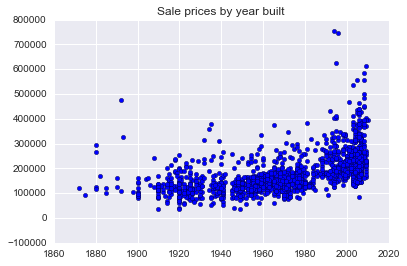

In [32]:
plt.scatter(data["YearBuilt"], data["SalePrice"])
plt.title("Sale prices by year built");

### Generally, homes built more recently command higher sale prices.

## 10. YearRemodAdd

YearRemodAdd represents the remodel date of the home. However, this value is the same as the construction date if no remodeling or additions were made to the home. I'm not quite sure how to treat this variable in the model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11baaf3c8>]], dtype=object)

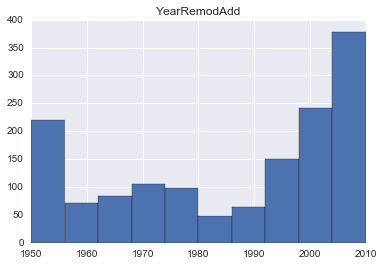

In [33]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
data.hist("YearRemodAdd")

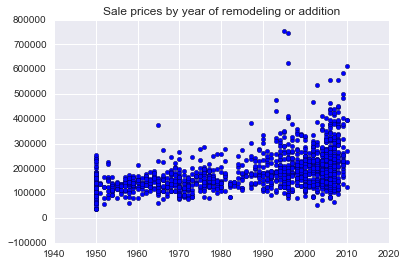

In [34]:
plt.scatter(data.YearRemodAdd, data.SalePrice)
plt.title("Sale prices by year of remodeling or addition");

## Other Features

The sections below look at the rest of the features in the dataset.

## 11. MSSubClass

MSSubClass is a categorical variable that identifies the type of dwelling involved in the sale.

The largest group is one-story homes built in 1946 or later. Combined with the second-, and third-largest groups (two-story homes built in 1946 or later, and one-and-a-half-story homes built at any time), these homes comprise slightly over two-thirds of all homes in the training set.

In [35]:
# MSSubClass: identifies type of dwelling involved in sale
ms_dict = {20:"One-story, 1946 and newer", 30:"One-story, 1945 and older",\
          40:"One-story with finished attic, all ages", 45:"One-and-a-half-story, unfinished, all ages",\
          50:"One-and-a-half-story, finished, all ages", 60:"Two-stories, 1946 and newer",\
          70:"Two-stories, 1945 and older", 75:"Two-and-a-half-stories, all ages",\
          80:"Split or multi-level", 85:"Split foyer", 90:"Duplex",\
          120:"One-story planned unit development", 150:"One-and-a-half-story planned unit development",\
          160:"Two-story planned unit development", 180:"Multilevel planned unit development",\
          190:"Two-family conversion"}
frequency_count(ms_dict,"MSSubClass")

,Number
"One-story, 1946 and newer",536
"Two-stories, 1946 and newer",299
"One-and-a-half-story, finished, all ages",144
One-story planned unit development,87
"One-story, 1945 and older",69
Two-story planned unit development,63
"Two-stories, 1945 and older",60
Split or multi-level,58
Duplex,52
Two-family conversion,30


In [36]:
mean_sale_prices(ms_dict, "MSSubClass")

,Mean Sale Price
"Two-stories, 1946 and newer",239948
One-story planned unit development,200779
"Two-and-a-half-stories, all ages",192437
"One-story, 1946 and newer",185224
Split or multi-level,169736
"Two-stories, 1945 and older",166772
"One-story with finished attic, all ages",156125
Split foyer,147810
"One-and-a-half-story, finished, all ages",143302
Two-story planned unit development,138647


## 12. MSZoning

MSZoning identifies the genreal zoning classification of the sale. The most common type of zoning classification, by far, is residential low density (1151 out of 1460 observations).

In [37]:
#Feature 12: MSZoning: Identifies the general zoning classification of the sale. String
zoning_dict = {"RL":"Residential low density", "RM":"Residential medium density",\
          "FV":"Floating village residential", "RH":"Residential high density",\
          "C (all)":"Commercial"}
frequency_count(zoning_dict,'MSZoning')

,Number
Residential low density,1151
Residential medium density,218
Floating village residential,65
Residential high density,16
Commercial,10


In [38]:
mean_sale_prices(zoning_dict,'MSZoning')

,Mean Sale Price
Floating village residential,214014
Residential low density,191004
Residential high density,131558
Residential medium density,126316
Commercial,74528


## 13. LotFrontage

LotFrontage is the number of linear feet of street connected to the property. 

There are 259 rows where this value is missing. Perhaps the mean value for LotFrontage should be imputed to these missing rows.

In [39]:
lf = data[data["LotFrontage"].isnull()==False]
lf.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

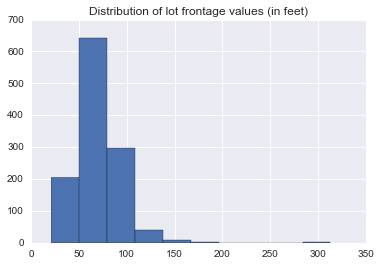

In [40]:
plt.hist(lf['LotFrontage'])
plt.title("Distribution of lot frontage values (in feet)");

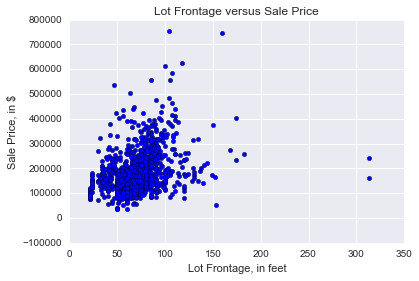

In [41]:
plt.scatter(lf["LotFrontage"],lf["SalePrice"])
plt.xlabel("Lot Frontage, in feet")
plt.ylabel("Sale Price, in $")
plt.title("Lot Frontage versus Sale Price")

## 14. LotArea

LotArea is the lot size in square feet.

In [42]:
data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

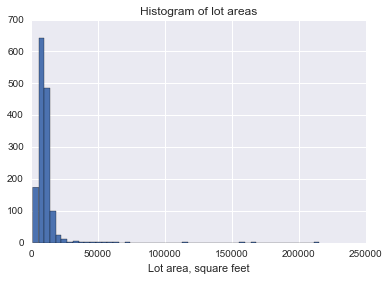

In [43]:
plt.hist(data["LotArea"], bins = 50)
plt.xlabel("Lot area, square feet")
plt.title("Histogram of lot areas");

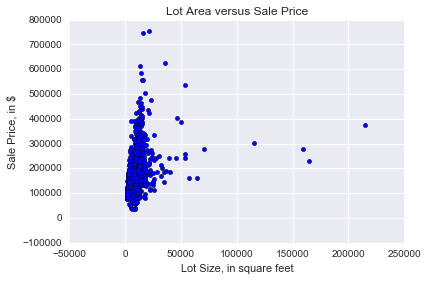

In [44]:
plt.scatter(data["LotArea"],data["SalePrice"])
plt.xlabel("Lot Size, in square feet")
plt.ylabel("Sale Price, in $")
plt.title("Lot Area versus Sale Price");

There seem to be a number of outliers. I am going to see what the data looks like for properties of less than 15,000 square feet. (As shown below, properties that are less than 15000 square feet constitute over 90% of the training set.)

In [45]:
under15K = data[data["LotArea"] < 15000]
print("Number of properties that are less than 15000 square feet:", len(under15K))
print("Portion of properties less than 15000 square feet in training set:", len(under15K)/len(data))

Number of properties that are less than 15000 square feet: 1338
Portion of properties less than 15000 square feet in training set: 0.9164383561643835


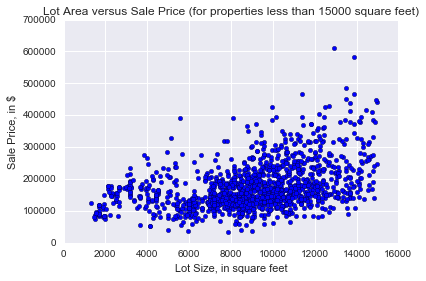

In [46]:
plt.scatter(under15K["LotArea"], under15K["SalePrice"])
plt.xlabel("Lot Size, in square feet")
plt.ylabel("Sale Price, in $")
plt.title("Lot Area versus Sale Price (for properties less than 15000 square feet)");

Larger properties seem to sell for higher, but this is not an especially pronounced trend.

## 15. Street

Street is a categorical value describing whether the property is accessed by a paved or gravel road. The overwhelming majority of properties are accessed by a paved road; only 6 out of 1460 properties in the training set are accessed by a gravel road.

In [47]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [48]:
print("Mean sale price of homes by street access type")
data.groupby("Street")["SalePrice"].mean()

Mean sale price of homes by street access type


Street
Grvl    130190
Pave    181130
Name: SalePrice, dtype: int64

Although there are few properties with a gravel road, it appears that such properties sell for considerably less on average than properties with a paved road.

## 16. Alley

Alley is a categorical value describing the alley access to the property (gravel, paved, or no alley access). 

It seems that few homes in Ames have alley access. Only 91 homes in the training set have any kind of alley access (whether gravel or paved).

In [49]:
# Feature 6 Alley: Type of alley access to property, str
data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [50]:
print("Mean sale price of home by alley access type")
data.groupby("Alley")["SalePrice"].mean()

Mean sale price of home by alley access type


Alley
Grvl    122219
Pave    168000
Name: SalePrice, dtype: int64

## 17. LotShape

### LotShape is a categorical variable describing the general shape of the property. Most of the properties in the training set are either regular or slightly irregular.

In [51]:
# Feature 7 LotShape: General shape of property, str
shape_dict = {"Reg":"Regular", "IR1":"Slightly irregular",\
          "IR2":"Moderately irregular", "IR3":"Irregular"}
frequency_count(shape_dict,'LotShape')

,Number
Regular,925
Slightly irregular,484
Moderately irregular,41
Irregular,10


In [52]:
mean_sale_prices(shape_dict,'LotShape')

,Mean Sale Price
Moderately irregular,239833
Irregular,216036
Slightly irregular,206101
Regular,164754


### Irregularly shaped plots seem to sell for more, on average.

## 18. LandContour

LandContour is a categorical variable describing the flatness of the property.

The vast majority of properties in the training set are near flat or level. 

In [53]:
# Feature 8 LandContour: Flatness of the property, str
# no missing values
lc_dict = {"Lvl":"Near flat/Level", "Bnk":"Banked",\
          "HLS":"Hillside", "Low":"Depression"}
frequency_count(lc_dict, 'LandContour')

,Number
Near flat/Level,1311
Banked,63
Hillside,50
Depression,36


In [54]:
mean_sale_prices(lc_dict, 'LandContour')

,Mean Sale Price
Hillside,231533
Depression,203661
Near flat/Level,180183
Banked,143104


### Hillside properties appear to command the highest sale prices.

## 19. Utilities

Utilities is a categorical variable representing the type of utilities available to the property. 

All but one property in the training set have gas, electricity, water, and sewage. Only one has electricity and gas, so I question whether this variable should be included in the model.

In [55]:
# Feature 9 Utilities: Type of utilities available, str
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## 20. LotConfig

LotConfig is a categorical value that represents the lot configuration of the property (i.e., an inside lot, corner lot, cul-de-sac, frontage on two sides of the property, or frontage on three sides of the property).

In [56]:
# Feature 10 LotConfig: Lot configuration, str
data.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [57]:
print("Mean sale price by lot configuration")
data.groupby("LotConfig")["SalePrice"].mean()

Mean sale price by lot configuration


LotConfig
Corner     181623
CulDSac    223854
FR2        177934
FR3        208475
Inside     176938
Name: SalePrice, dtype: int64

## 21. LandSlope

Landslope is a categorical value that represents the property's slope (gentle ("Gtl"), moderate ("Mod"), or severe ("Sev")). The overwhelming majority of properties in the training set have gentle slopes.

In [58]:
# Feature 11: LandSlope: Slope of property, str
data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [59]:
data.groupby("LandSlope")["SalePrice"].mean()

LandSlope
Gtl    179956
Mod    196734
Sev    204379
Name: SalePrice, dtype: int64

## 22. Neighborhood

Neighborhood is a categorical variable that represents, well, the neighborhood in which the property is located.

Given the cliche that the most important thing about a property is "location, location, and location", I would expect this variable to be important in the model. However, there are quite a few neighborhoods represented in the training set. Perhaps the rarer neighborhoods can be consolidated in an "Other" category.

In [60]:
# Feature 12 Neighborhood: Physical locations within Ames city limits, str
data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [61]:
print("Mean sale prices by neighborhood")
data.groupby("Neighborhood")["SalePrice"].mean()

Mean sale prices by neighborhood


Neighborhood
Blmngtn    194870
Blueste    137500
BrDale     104493
BrkSide    124834
ClearCr    212565
CollgCr    197965
Crawfor    210624
Edwards    128219
Gilbert    192854
IDOTRR     100123
MeadowV     98576
Mitchel    156270
NAmes      145847
NPkVill    142694
NWAmes     189050
NoRidge    335295
NridgHt    316270
OldTown    128225
SWISU      142591
Sawyer     136793
SawyerW    186555
Somerst    225379
StoneBr    310499
Timber     242247
Veenker    238772
Name: SalePrice, dtype: int64

### As expected, mean sale prices vary significantly by neighborhood, ranging from 335K in NoRidge (Northridge) to 98K in MeadowV (Meadow Village).

## 23. Condition1

Condition1 is a categorical variable that represents whether a home is adjacent to or near one of the following features.

* Norm: Normal
* Artery: Adjacent to arterial street
* Feedr: Adjacent to feeder street	
* RRNn: Within 200' of North-South Railroad
* RRAn: Adjacent to North-South Railroad
* PosN: Near positive off-site feature--park, greenbelt, etc.
* PosA: Adjacent to postive off-site feature
* RRNe: Within 200' of East-West Railroad
* RRAe: Adjacent to East-West Railroad

Most houses in the training set are not adjacent to or near one of the above features.

In [62]:
# Feature 13 Condition1: Proximity to various conditions
data.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [63]:
print("Mean sale price of houses adjacent to or near certain features")
data.groupby("Condition1")["SalePrice"].mean()

Mean sale price of houses adjacent to or near certain features


Condition1
Artery    135091
Feedr     142475
Norm      184495
PosA      225875
PosN      215184
RRAe      138400
RRAn      184396
RRNe      190750
RRNn      212400
Name: SalePrice, dtype: int64

## 24. Condition2

Condition2 is a categorical feature indicating if a home is also near or adjacent to another of the features represented by Condition1 (see above). Very few homes in the training set are near or adjacent to a second feature.

In [64]:
# Feature 14 Condition2: Proximity to various conditions (if more than one is present)
data.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [65]:
print("Mean sale price of houses adjacent to or near a second feature")
data.groupby("Condition2")["SalePrice"].mean()

Mean sale price of houses adjacent to or near a second feature


Condition2
Artery    106500
Feedr     121166
Norm      181169
PosA      325000
PosN      284875
RRAe      190000
RRAn      136905
RRNn       96750
Name: SalePrice, dtype: int64

## 25. BldgType

BldgType is a categorical variabel that represents the type of dwelling. Most of the houses in the training set are single-family detached homes.

In [66]:
# Feature 15 BldgType: Type of dwelling
bldg_type_dict = {"1Fam":"Single-family, detached", "TwnhsE":"Townhouse, end unit",\
          "Duplex":"Duplex", "Twnhs":"Townhouse, inside unit", "2fmCon":"Two-family conversion"}
frequency_count(bldg_type_dict,'BldgType')

,Number
"Single-family, detached",1220
"Townhouse, end unit",114
Duplex,52
"Townhouse, inside unit",43
Two-family conversion,31


In [67]:
mean_sale_prices(bldg_type_dict,'BldgType')

,Mean Sale Price
"Single-family, detached",185763
"Townhouse, end unit",181959
"Townhouse, inside unit",135911
Duplex,133541
Two-family conversion,128432


### Detached one-family homes and townhouse end units sell for considerably more, on average, than other types of homes.

## 26. HouseStyle

HouseStyle is a categorical variable representing the style of the dwelling. Most of the homes in the training set are one- or two-story buildings.

In [68]:
house_style_dict = {"1Story":"One-story", "2Story":"Two-story", "1.5Fin":"One-and-a-half story, 2nd level finished",\
                    "SLvl":"Split-level", "SFoyer":"Split foyer", "1.5Unf":"One-and-a-half story, 2nd level unfinished",\
                   "2.5Unf":"Two-and-one-half story, 2nd level unfinished", "2.5Fin":"Two-and-one-half story, 2nd level finished"}
frequency_count(house_style_dict, "HouseStyle")

,Number
One-story,726
Two-story,445
"One-and-a-half story, 2nd level finished",154
Split-level,65
Split foyer,37
"One-and-a-half story, 2nd level unfinished",14
"Two-and-one-half story, 2nd level unfinished",11
"Two-and-one-half story, 2nd level finished",8


In [69]:
mean_sale_prices(house_style_dict, "HouseStyle")

,Mean Sale Price
"Two-and-one-half story, 2nd level finished",220000
Two-story,210051
One-story,175985
Split-level,166703
"Two-and-one-half story, 2nd level unfinished",157354
"One-and-a-half story, 2nd level finished",143116
Split foyer,135074
"One-and-a-half story, 2nd level unfinished",110150


## 27. OverallCond

OverallCond is a categorical variable that represents the overall condition of the house. Houses are rated on a scale from 1 ("very poor") to 10 ("very excellent").

Judging from the histogram below, the housing stock in Ames seems to be pretty good. Most houses are in at least average condition, with a significant minority in better than average condition. Homes in worse than average condition are a distinct minority of the training set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8ba9b0>]], dtype=object)

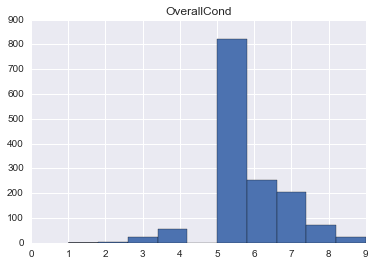

In [70]:
# OverallCond: Rates the overall condition of the house, int
data.hist("OverallCond")

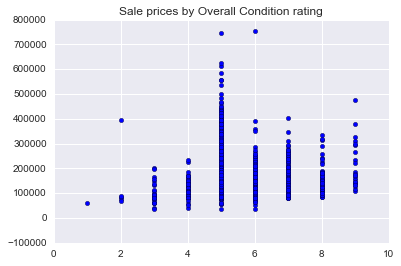

In [71]:
plt.scatter(data["OverallCond"], data["SalePrice"])
plt.title("Sale prices by Overall Condition rating");

## 28. RoofStyle

RoofStyle is a categorical variable representing the type of roof on the home. Gable roofs appear to be quite popular among home-buyers in the Ames market.

In [72]:
# RoofStyle: Type of roof
data.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [73]:
print("Mean sales price by roof style")
data.groupby("RoofStyle")["SalePrice"].mean()

Mean sales price by roof style


RoofStyle
Flat       194690
Gable      171483
Gambrel    148909
Hip        218876
Mansard    180568
Shed       225000
Name: SalePrice, dtype: int64

## 29. RoofMatl

RoofMatl is a categorical variable representing the type of material used in the house's roof.

Given that so many of the houses in the training set have standard (composite) shingle roofs, I am skeptical that this variable will be helpful.

In [74]:
# Feature 22, RoofMatl: Roof material
roof_matl_dict = {"CompShg":"Standard (composite) shingle", "Tar&Grv":"Tar & Gravel",\
                 "WdShngl":"Wood shingles","WdShake":"Wood shakes","Membran":"Membrane",\
                 "Metal":"Metal","Roll":"Roll","ClyTile":"Clay or tile"}
frequency_count(roof_matl_dict, "RoofMatl")

,Number
Standard (composite) shingle,1434
Tar & Gravel,11
Wood shingles,6
Wood shakes,5
Roll,1
Metal,1
Clay or tile,1
Membrane,1


In [75]:
mean_sale_prices(roof_matl_dict, "RoofMatl")

,Mean Sale Price
Wood shingles,390250
Membrane,241500
Wood shakes,241400
Tar & Gravel,185406
Metal,180000
Standard (composite) shingle,179803
Clay or tile,160000
Roll,137000


## 30. Exterior1st

Exterior1st is a categorical variable describing the type of exterior covering on the house. The top 5 categories account for 87% of the training set, and so I'm thinking that consolidating the other categories may be a good idea.

In [76]:
# Feature 23, Exterior1st: Exterior covering on house
ext1_dict = {'VinylSd':'Vinyl siding','HdBoard':'Hard board', 'MetalSd':'Metal siding',\
            'Wd Sdng':'Wood siding','Plywood':'Plywood','CemntBd':'Cement board',\
            'BrkFace':'Brick face','WdShing':'Wood shingles','Stucco':'Stucco',\
            'AsbShng':'Asbestos shingles','Stone':'Stone','BrkComm':'Brick common',\
            'AsphShn':'Asphalt shingles','ImStucc':'Imitation stucco','CBlock':'Cinder block'}
frequency_count(ext1_dict, "Exterior1st")

,Number
Vinyl siding,515
Hard board,222
Metal siding,220
Wood siding,206
Plywood,108
Cement board,61
Brick face,50
Wood shingles,26
Stucco,25
Asbestos shingles,20


In [77]:
mean_sale_prices(ext1_dict, "Exterior1st")

,Mean Sale Price
Imitation stucco,262000
Stone,258500
Cement board,231690
Vinyl siding,213732
Brick face,194573
Plywood,175942
Hard board,163077
Stucco,162990
Wood shingles,150655
Wood siding,149841


## 31. Exterior2nd

Exterior2nd is a categorical variable describing the exterior covering on the house, if more than one material.

In [78]:
data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [79]:
# Feature 24 Exterior2nd: Exterior covering on house (if more than one material)
ext2_dict = {'VinylSd':'Vinyl siding','HdBoard':'Hard board', 'MetalSd':'Metal siding',\
            'Wd Sdng':'Wood siding','Plywood':'Plywood','CmentBd':'Cement board',\
            'BrkFace':'Brick face','Wd Shng':'Wood shingles','Stucco':'Stucco',\
            'AsbShng':'Asbestos shingles','Stone':'Stone','Brk Cmn':'Brick common',\
            'AsphShn':'Asphalt shingles','ImStucc':'Imitation stucco','CBlock':'Cinder block',\
            'Other':'Other'}
frequency_count(ext2_dict, "Exterior2nd")

,Number
Vinyl siding,504
Metal siding,214
Hard board,207
Wood siding,197
Plywood,142
Cement board,60
Wood shingles,38
Stucco,26
Brick face,25
Asbestos shingles,20


In [80]:
mean_sale_prices(ext2_dict, "Exterior2nd")

,Mean Sale Price
Other,319000
Imitation stucco,252070
Cement board,230093
Vinyl siding,214432
Brick face,195818
Plywood,168112
Hard board,167661
Wood shingles,161328
Stone,158224
Stucco,155905


## 32. MasVnrType

MasVnrType is a categorical variable representing the type of masonry veneer on the house. Most homes in the training set do not appear to have masonry.

In [81]:
# Feature 25 MasVnrType: Masonry veneer type
mason_dict = {'None':'None', 'BrkFace':'Brick Face','Stone':'Stone','BrkCmn':'Brick Common'}
frequency_count(mason_dict, "MasVnrType")

,Number
None,864
Brick Face,445
Stone,128
Brick Common,15


In [82]:
mean_sale_prices(mason_dict,"MasVnrType")

,Mean Sale Price
Stone,265583
Brick Face,204691
None,156221
Brick Common,146318


## 33. MasVnrArea

MasVnrArea is a numeric variable representing the square feet of the masonry veneer area of a home. Barely 40% of the houses in the training set have any masonry veneer.

In [83]:
veneer = data[data["MasVnrArea"]>0]
print("% of homes with any masonry veneer", len(veneer) / len(data))

% of homes with any masonry veneer 0.4047945205479452


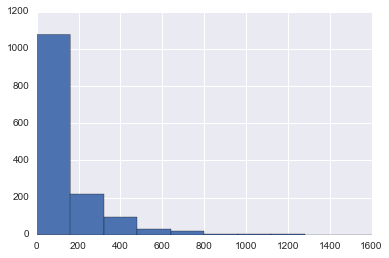

In [84]:
# Feature 26 MasVnrArea: Masonry veneer area in square feet
data.MasVnrArea.hist()

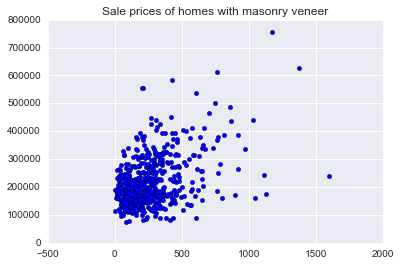

In [85]:
plt.scatter(veneer["MasVnrArea"], veneer["SalePrice"])
plt.title("Sale prices of homes with masonry veneer");

In [86]:
print("Mean sale price of homes with masonry veneer:", veneer.SalePrice.mean())
print("Mean sale price of homes without masonry veneer:", data[data["MasVnrArea"]<1].SalePrice.mean())

Mean sale price of homes with masonry veneer: 215662.74111675128
Mean sale price of homes without masonry veneer: 156557.94657375145


### Evidently, the presence of masonry veneer increases the sale price of a home, on average.

## 34. ExterQual

ExterQual is a categorical variable representing the quality rating of the house's exterior materials. Most houses in the training set are of average/typical or good quality.

In [87]:
exterqual_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor'}
frequency_count(exterqual_dict, "ExterQual")

,Number
Typical/average,906
Good,488
Excellent,52
Fair,14


In [88]:
mean_sale_prices(exterqual_dict, "ExterQual")

,Mean Sale Price
Excellent,367360
Good,231633
Typical/average,144341
Fair,87985


### Not surprisingly, higher quality materials are correlated with higher mean sale prices.

## 35. ExterCond

ExterCond is a categorical value--the rating of the present condition of the home's exterior material.

In [89]:
frequency_count(exterqual_dict, "ExterCond")

,Number
Typical/average,1282
Good,146
Fair,28
Excellent,3
Poor,1


In [90]:
mean_sale_prices(exterqual_dict, "ExterCond")

,Mean Sale Price
Excellent,201333
Typical/average,184034
Good,168897
Fair,102595
Poor,76500


### Curiously, homes with a "good" rating have a lower mean sale price than homes with only a "typical/average" rating.

## 36. Foundation

Foundation is a categorical variable describing the type of foundation. Most homes in the training set have foundations of poured concrete or cinder block.

In [91]:
found_dict = {'BrkTil':'Brick & tile','CBlock':'Cinder block','PConc':'Poured concrete',\
             'Slab':'Slab','Stone':'Stone','Wood':'Wood'}
frequency_count(found_dict,"Foundation")

,Number
Poured concrete,647
Cinder block,634
Brick & tile,146
Slab,24
Stone,6
Wood,3


In [92]:
mean_sale_prices(found_dict,"Foundation")

,Mean Sale Price
Poured concrete,225230
Wood,185666
Stone,165959
Cinder block,149805
Brick & tile,132291
Slab,107365


## 37. BsmtQual

BsmtQual is a categorical variable that represents the height of the basement.

In [93]:
bsmt_qual_dict = {'TA':'80-90 inches', 'Gd':'90-99 inches','Ex':'100+ inches',\
                 'Fa':'70-79 inches'}
frequency_count(bsmt_qual_dict, "BsmtQual")

,Number
80-90 inches,649
90-99 inches,618
100+ inches,121
70-79 inches,35


In [94]:
mean_sale_prices(bsmt_qual_dict, "BsmtQual")

,Mean Sale Price
100+ inches,327041
90-99 inches,202688
80-90 inches,140759
70-79 inches,115692


## 38. BsmtCond

BsmtCond is a categorical variable representing the evaluation of the general condition of a home's basement.

In [95]:
bsmt_cond_dict = {'TA':'Typical - slight dampness','Gd':'Good','Ex':'Excellent',\
                  'Fa':'Fair - dampness or some cracking or settling',\
                  'Po':'Poor - severe cracking, settling, or dampness',\
                 'NA':'No basement'}
frequency_count(bsmt_cond_dict, "BsmtCond")

,Number
Typical - slight dampness,1311
Good,65
Fair - dampness or some cracking or settling,45
"Poor - severe cracking, settling, or dampness",2


In [96]:
mean_sale_prices(bsmt_cond_dict, "BsmtCond")

,Mean Sale Price
Good,213599
Typical - slight dampness,183632
Fair - dampness or some cracking or settling,121809
"Poor - severe cracking, settling, or dampness",64000


## 39. BsmtExposure

BsmtExposure is a categorical variabel that refers to walkout or garden level walls.

In [97]:
bsmt_exp_dict = {'No':'No exposure','Av':'Average exposure','Gd':'Good exposure',\
                'Mn':'Minimum exposure',"NA":'No basement'}
frequency_count(bsmt_exp_dict,"BsmtExposure")

,Number
No exposure,953
Average exposure,221
Good exposure,134
Minimum exposure,114


In [98]:
mean_sale_prices(bsmt_exp_dict,"BsmtExposure")

,Mean Sale Price
Good exposure,257689
Average exposure,206643
Minimum exposure,192789
No exposure,165652


## 40. BsmtFinType1

BsmtFinType1 is a categorical variable that reflects the rating of a home's basement finished area.

In [99]:
bsmt_fin_type_dict = {'Unf':'Unfinished','GLQ':'Good living quarters','ALQ':'Average living quarters',\
                     'BLQ':'Below average living quarters','Rec':'Average rec room',\
                     'LwQ':'Low quality','NA':'No basement'}
frequency_count(bsmt_fin_type_dict,"BsmtFinType1")

,Number
Unfinished,430
Good living quarters,418
Average living quarters,220
Below average living quarters,148
Average rec room,133
Low quality,74


In [100]:
mean_sale_prices(bsmt_fin_type_dict,"BsmtFinType1")

,Mean Sale Price
Good living quarters,235413
Unfinished,170670
Average living quarters,161573
Low quality,151852
Below average living quarters,149493
Average rec room,146889


## 41. BsmtFinSF1

BsmtFinSF1 is a numeric variable representing "Type 1" finished square feet.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c63feb8>]], dtype=object)

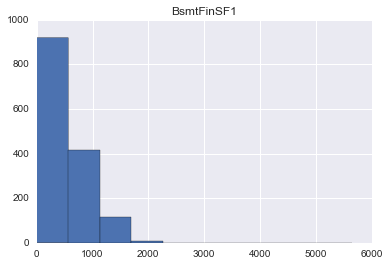

In [101]:
#Feature 34, BsmtFinSF1: Type 1 finished square feet
data.hist("BsmtFinSF1")

It looks like most of the homes in the training set do not have any Type 1 finished square feet. The next histogram shows the distribution of those that have some Type 1 finished square feet.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8c5320>]], dtype=object)

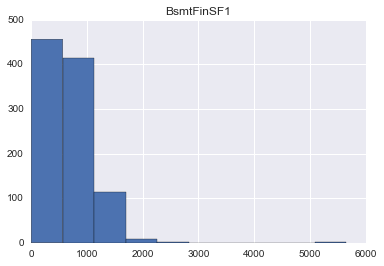

In [102]:
some_type1 = data[data["BsmtFinSF1"]>0]
some_type1.hist("BsmtFinSF1")

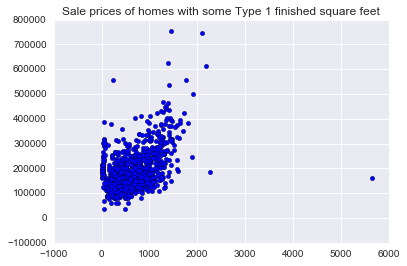

In [103]:
plt.scatter(some_type1["BsmtFinSF1"],some_type1["SalePrice"])
plt.title("Sale prices of homes with some Type 1 finished square feet")

In [104]:
print("Mean sale price of homes with some Type 1 finished square feet:", some_type1.SalePrice.mean())
print("Mean sale price of other homes:", data[data["BsmtFinSF1"]==0].SalePrice.mean())

Mean sale price of homes with some Type 1 finished square feet: 188164.59315206445
Mean sale price of other homes: 165519.28265524626


## 42. BsmtFinType2

BsmtFinType2 is a categorical variable representing the rating of the basement's finished areas, if the house has multiple types of finished areas in its basement.

In [105]:
frequency_count(bsmt_fin_type_dict,"BsmtFinType2")

,Number
Unfinished,1256
Average rec room,54
Low quality,46
Below average living quarters,33
Average living quarters,19
Good living quarters,14


In [106]:
mean_sale_prices(bsmt_fin_type_dict,"BsmtFinType2")

,Mean Sale Price
Average living quarters,209942
Unfinished,184694
Good living quarters,180982
Average rec room,164917
Low quality,164364
Below average living quarters,151101


## 43. BsmtFinSF2

BsmtFinSF2 is a numeric variable representing the number of square feet of the finished areas corresponding to BsmtFinType2 (see above).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c34cd68>]], dtype=object)

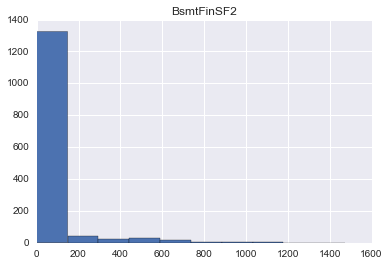

In [107]:
# Feature 36, BsmtFinSF2: Type 2 finished square feet
data.hist("BsmtFinSF2")

Judging from the histogram, it seems that most homes have a value of zero for this variable. The histogram below shows the distribution for homes with some square feet in this category.

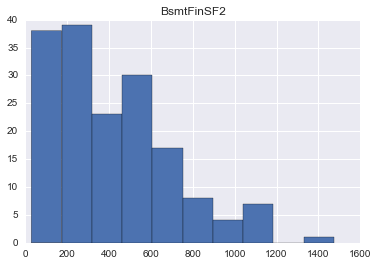

In [108]:
some_sf2 = data[data["BsmtFinSF2"]>0]
some_sf2.hist("BsmtFinSF2");

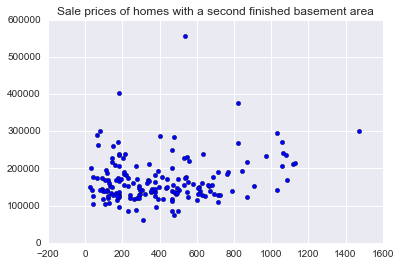

In [109]:
plt.scatter(some_sf2["BsmtFinSF2"],some_sf2["SalePrice"])
plt.title("Sale prices of homes with a second finished basement area");

In [110]:
print("Mean sale price of homes with a second finished basement area:",some_sf2.SalePrice.mean())
print("Mean sale price of other homes:",data[data["BsmtFinSF2"]==0].SalePrice.mean())

Mean sale price of homes with a second finished basement area: 169217.11377245508
Mean sale price of other homes: 182432.86001546792


## 44. BsmtUnfSF

BsmtUnfSF is a numeric variable measuring the unfinished square feet of a home's basement.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd9b080>]], dtype=object)

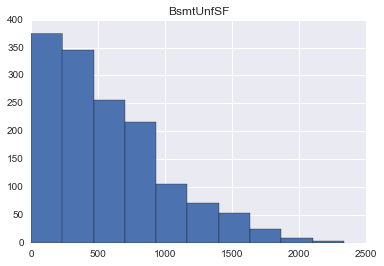

In [111]:
# Feature 37, BsmtUnfSF: Unfinished square feet of basement area
data.hist("BsmtUnfSF")

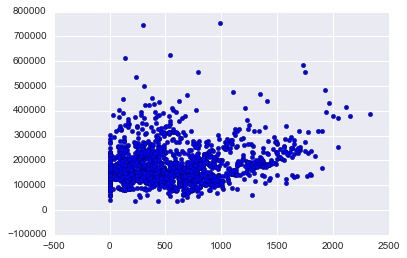

In [112]:
plt.scatter(data.BsmtUnfSF, data.SalePrice)

## 45. Heating

Heating is a categorical variable representing the type of heating used in a home. The vast majority of homes in the training set are gas heated, using a forced warm air furnace.

In [113]:
heating_dict = {'GasA':'Gas forced warm air furnace', 'GasW':'Gas hot water or steam heat',\
               'Grav':'Gravity furnace','Wall':'Wall furnace','OthW':'Hot water or steam heat other than gas',\
               'Floor':'Floor Furnace'}
frequency_count(heating_dict, "Heating")

,Number
Gas forced warm air furnace,1428
Gas hot water or steam heat,18
Gravity furnace,7
Wall furnace,4
Hot water or steam heat other than gas,2
Floor Furnace,1


In [114]:
mean_sale_prices(heating_dict, "Heating")

,Mean Sale Price
Gas forced warm air furnace,182021
Gas hot water or steam heat,166632
Hot water or steam heat other than gas,125750
Wall furnace,92100
Gravity furnace,75271
Floor Furnace,72500


## 46. HeatingQC

HeatingQC is a categorical variable representing the quality and condition of a home's heating system. More than half of the homes in the training set have an excellent heating system, which is undoubtedly desirable for those cold Iowa winters.

In [115]:
heatingqc_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor'}
frequency_count(heatingqc_dict, "HeatingQC")

,Number
Excellent,741
Typical/average,428
Good,241
Fair,49
Poor,1


In [116]:
mean_sale_prices(heatingqc_dict, "HeatingQC")

,Mean Sale Price
Excellent,214914
Good,156858
Typical/average,142362
Fair,123919
Poor,87000


## 47. CentralAir

CentralAir is a categorical variable that represents whether a home has central air conditioning. Most of the houses in the training set have central air conditioning.

In [117]:
# Feature 41, CentralAir: Central air conditioning
data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [118]:
print("Mean sale prices of homes with and without central A/C")
data.groupby("CentralAir")["SalePrice"].mean()

Mean sale prices of homes with and without central A/C


CentralAir
N    105264
Y    186186
Name: SalePrice, dtype: int64

## 48. Electrical

Electrical is a categorical variable that represents the type of electrical system used in a home. Most homes in the training set use standard circuit breakers and Romex.

In [119]:
elec_dict = {'SBrkr':'Standard Circuit Breakers & Romex',\
             'FuseA':'Fuse Box over 60 AMP and all Romex wiring (Average)',\
             'FuseF':'60 AMP Fuse Box and mostly Romex wiring (Fair)',\
            'FuseP':'60 AMP Fuse Box and mostly knob & tube wiring (poor)', "Mix":"Mixed"}
frequency_count(elec_dict, "Electrical")

,Number
Standard Circuit Breakers & Romex,1334
Fuse Box over 60 AMP and all Romex wiring (Average),94
60 AMP Fuse Box and mostly Romex wiring (Fair),27
60 AMP Fuse Box and mostly knob & tube wiring (poor),3
Mixed,1


In [120]:
mean_sale_prices(elec_dict, "Electrical")

,Mean Sale Price
Standard Circuit Breakers & Romex,186825
Fuse Box over 60 AMP and all Romex wiring (Average),122196
60 AMP Fuse Box and mostly Romex wiring (Fair),107675
60 AMP Fuse Box and mostly knob & tube wiring (poor),97333
Mixed,67000


## 49. 2ndFlrSF

2ndFlrSF is a numeric variable measuring the square footage of the second floor of a home. Again, I would expect that, all else equal, the more second-floor square footage, the higher the sale price.

However, as the histogram below shows, most homes in the training set do not have a second floor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf52c88>]], dtype=object)

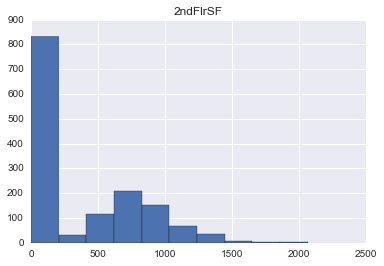

In [121]:
# Feature 44, 2ndFlrSF: Second floor square feet
data.hist("2ndFlrSF")

#### Let's see how mean sale prices differ for one-story and two-story homes.

In [122]:
oneFloor = data[data["2ndFlrSF"] == 0]
twoFloor = data[data["2ndFlrSF"] != 0]
print("Number of one-story homes:", len(oneFloor))
print("Number of two-story homes:", len(twoFloor))
print()
print("One story, mean sale price:", oneFloor.SalePrice.mean())
print("Two-stories, mean sale price:", twoFloor.SalePrice.mean())

Number of one-story homes: 829
Number of two-story homes: 631

One story, mean sale price: 171383.6706875754
Two-stories, mean sale price: 193451.47860538829


### For those homes with two stories, let's see if the amount of second floor square-footage is related to the sale price.

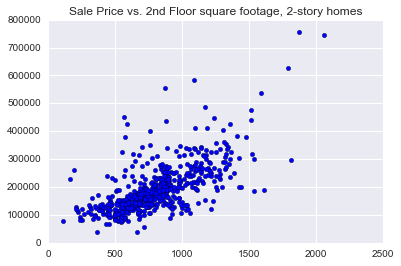

In [123]:
plt.scatter(twoFloor["2ndFlrSF"],twoFloor["SalePrice"])
plt.title("Sale Price vs. 2nd Floor square footage, 2-story homes")

## 50. LowQualFinSF

LowQualFinSF is a numeric variable representing the total low quality finished square feet (for all floors) of a home.

In [124]:
lq = data[data['LowQualFinSF']>0]
print("Total number of homes with any low quality finished square feet:", len(lq))

Total number of homes with any low quality finished square feet: 26


#### There are very few homes with any low quality finished square feet in the training set.

The histogram below shows the distribution for these 26 homes.

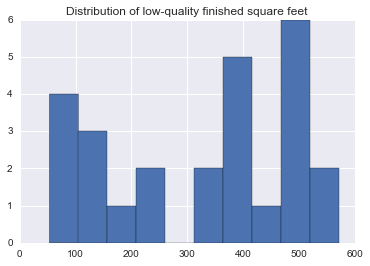

In [125]:
# Feature 45, LowQualFinSF: Low quality finished square feet (all floors)
plt.hist(lq["LowQualFinSF"])
plt.title("Distribution of low-quality finished square feet");

In [126]:
print("Mean sale price of homes with any low quality finished square feet:",lq.SalePrice.mean())

Mean sale price of homes with any low quality finished square feet: 152652.0


## 51. BsmtFullBath

BsmtFullBath represents the number of full bathrooms in a home's basement.

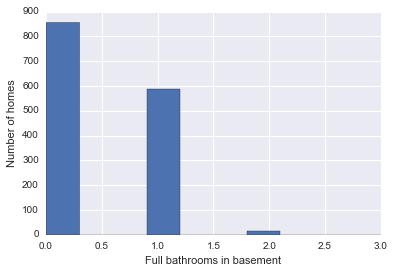

In [127]:
# Feature 47, BsmtFullBath: Basement full bathrooms
plt.hist(data.BsmtFullBath)
plt.xlabel("Full bathrooms in basement")
plt.ylabel("Number of homes")

In [128]:
print("Mean sale prices of homes, grouped by number of full bathrooms in basement")
data.groupby("BsmtFullBath").SalePrice.mean()

Mean sale prices of homes, grouped by number of full bathrooms in basement


BsmtFullBath
0    165521
1    202522
2    213063
3    179000
Name: SalePrice, dtype: int64

## 52. BsmtHalfBath

BsmtHalfBath is a numeric variable measuring the number of half bathrooms in a home.

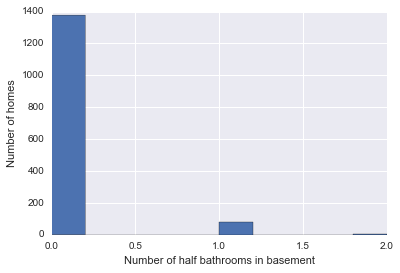

In [129]:
# Feature 48, BsmtHalfBath: Basement half bathrooms
plt.hist(data.BsmtHalfBath)
plt.xlabel("Number of half bathrooms in basement")
plt.ylabel("Number of homes")

In [130]:
print("Mean sale prices of homes, grouped by number of half bathrooms in basement")
data.groupby("BsmtHalfBath").SalePrice.mean()

Mean sale prices of homes, grouped by number of half bathrooms in basement


BsmtHalfBath
0    181230
1    176098
2    160850
Name: SalePrice, dtype: int64

## 53. HalfBath

HalfBath is a numeric variable measuring the number of half bathrooms above grade in a home.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d56e278>]], dtype=object)

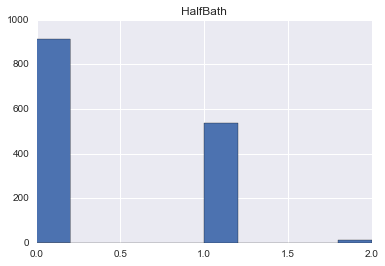

In [131]:
# Feature 50, HalfBath: Half baths above grade
data.hist("HalfBath")

In [132]:
print("Mean sale prices, grouped by number of half bathrooms above grade")
data.groupby("HalfBath").SalePrice.mean()

Mean sale prices, grouped by number of half bathrooms above grade


HalfBath
0    162534
1    212721
2    162028
Name: SalePrice, dtype: int64

## 54. BedroomAbvGr

BedroomAbvGr is a numeric variable representing the number of bedrooms above grade in a home. Basement bedrooms are not included.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d68bba8>]], dtype=object)

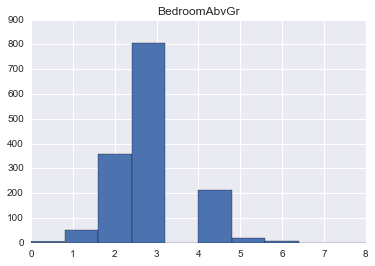

In [133]:
# Feature 51, BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
data.hist("BedroomAbvGr")

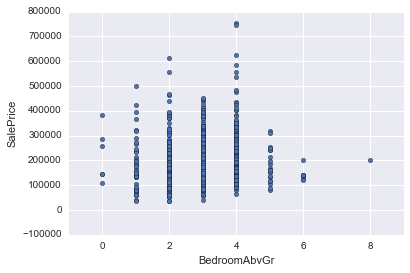

In [134]:
data.plot.scatter(x = "BedroomAbvGr", y = "SalePrice")

In [135]:
print("Mean sale price, grouped by number of bedrooms above grade")
data.groupby("BedroomAbvGr").SalePrice.mean()

Mean sale price, grouped by number of bedrooms above grade


BedroomAbvGr
0    221493
1    173162
2    158197
3    181056
4    220421
5    180819
6    143779
8    200000
Name: SalePrice, dtype: int64

## 55. KitchenAbvGr

KitchenAbvGr is a numeric variable representing the number of kitchens above grade in a home. Not surprisingly, most homes in the training set have only one kitchen.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d8f1ac8>]], dtype=object)

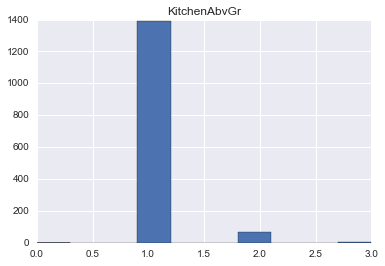

In [136]:
# Feature 52, KitchenAbvGr: Kitchens above grade
data.hist("KitchenAbvGr")

In [137]:
print("Mean sale price, grouped by number of kitchens above grade")
data.groupby("KitchenAbvGr").SalePrice.mean()

Mean sale price, grouped by number of kitchens above grade


KitchenAbvGr
0    127500
1    183388
2    131096
3    109500
Name: SalePrice, dtype: int64

## 56. KitchenQual

KitchenQual is a categorical variable representing the quality of the home's kitchen.

In [138]:
kitchen_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor'}
frequency_count(kitchen_dict,'KitchenQual')

,Number
Typical/average,735
Good,586
Excellent,100
Fair,39


In [139]:
mean_sale_prices(kitchen_dict,'KitchenQual')

,Mean Sale Price
Excellent,328554
Good,212116
Typical/average,139962
Fair,105565


### Not surprisingly, homes with kitchens of excellent or good quality command higher prices, on average, than homes with kitchens of lower quality.

## 57. Functional

Functional is a categorical value representing the home's functionality.

In [140]:
functional_dict =  {'Typ':'Typical Functionality', 'Min2':'Minor Deductions 2',\
                   'Min1':'Minor Deductions 1','Mod':'Moderate Deductions',\
                   'Maj1':'Major Deductions 1','Maj2':'Major Deductions 2',\
                   'Sev':'Severe Damage','Sal':'Salvage only'}
frequency_count(functional_dict,'Functional')

,Number
Typical Functionality,1360
Minor Deductions 2,34
Minor Deductions 1,31
Moderate Deductions,15
Major Deductions 1,14
Major Deductions 2,5
Severe Damage,1


In [141]:
mean_sale_prices(functional_dict,'Functional')

,Mean Sale Price
Typical Functionality,183429
Moderate Deductions,168393
Major Deductions 1,153948
Minor Deductions 1,146385
Minor Deductions 2,144240
Severe Damage,129000
Major Deductions 2,85800


## 58. Fireplaces

Fireplaces is a numeric variable that, rather straightforwardly, measures the number of fireplaces in a home.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d9e1da0>]], dtype=object)

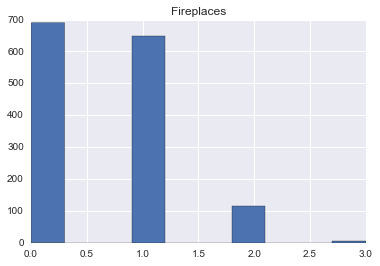

In [142]:
# Feature 56, Fireplaces: Number of fireplaces
data.hist("Fireplaces")

### A plurality of homes in the training set do not have a fireplace. Let's see if the average sale price of homes without a fireplace differs from the average sale price of homes with a fireplace.

In [143]:
noFP = data[data["Fireplaces"]==0]
FP = data[data["Fireplaces"]>0]
print("Avg Sale Price, no fireplace:", noFP.SalePrice.mean())
print("Avg Sale Price, at least 1 fireplace:", FP.SalePrice.mean())

Avg Sale Price, no fireplace: 141331.48260869566
Avg Sale Price, at least 1 fireplace: 216397.69220779222


### Evidently, the presence of at least one fireplace in a home increases the average sale price considerably.

## 59. FireplaceQu

FireplaceQu is a categorical variable that rates the quality of the fireplace in a home.

In [144]:
# Feature 57, FireplaceQu: Fireplace quality
fq_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor'}
frequency_count(fq_dict, "FireplaceQu")

,Number
Good,380
Typical/average,313
Fair,33
Excellent,24
Poor,20


In [145]:
mean_sale_prices(fq_dict, "FireplaceQu")

,Mean Sale Price
Excellent,337712
Good,226351
Typical/average,205723
Fair,167298
Poor,129764


## 60. GarageType

GarageType is a categorical variable describing the type of a home's garage.

In [146]:
# Feature 58, GarageType: Garage location
garage_dict = {'2Types':'More than one type of garage','Attchd':'Attached to home',\
              'Basment':'Basement garage','BuiltIn':'Built-In (part of house - typically with room above garage)',\
              'CarPort':'Car port','Detchd':'Detached from home','NA':'No garage'}
frequency_count(garage_dict, "GarageType")

,Number
Attached to home,870
Detached from home,387
Built-In (part of house - typically with room above garage),88
Basement garage,19
Car port,9
More than one type of garage,6


In [147]:
mean_sale_prices(garage_dict, "GarageType")

,Mean Sale Price
Built-In (part of house - typically with room above garage),254751
Attached to home,202892
Basement garage,160570
More than one type of garage,151283
Detached from home,134091
Car port,109962


### A home with an attached or built-in garage has a higher sale price, on average, than a home with a different type of garage.

## 61. GarageYrBlt

GarageYrBlt represents the year the home's garage was built. Not surprisingly, given that the largest group of homes in the training set were built in 2000 or later, the largest group of garages was also built in 2000 or later.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce55518>]], dtype=object)

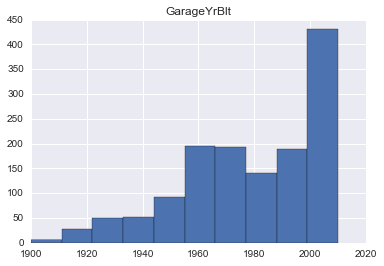

In [148]:
# Feature 59, GarageYrBlt: Year garage was built
data.hist("GarageYrBlt")

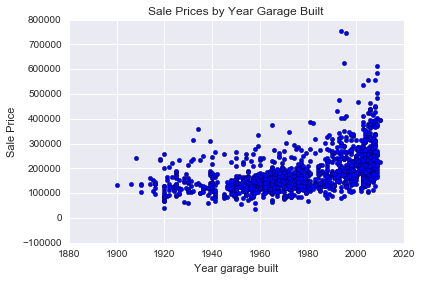

In [149]:
plt.scatter(data.GarageYrBlt, data.SalePrice)
plt.title("Sale Prices by Year Garage Built")
plt.xlabel("Year garage built")
plt.ylabel("Sale Price")

## 62. GarageFinish

GarageFinish is a categorical variable indicating the interior finish of a home's garage.

In [150]:
gf_dict = {'Fin':'Finished','RFn':'Rough finished','Unf':'Unfinished','NA':'No garage'}
frequency_count(gf_dict, "GarageFinish")

,Number
Unfinished,605
Rough finished,422
Finished,352


In [151]:
mean_sale_prices(gf_dict, "GarageFinish")

,Mean Sale Price
Finished,240052
Rough finished,202068
Unfinished,142156


## 63. GarageQual

GarageQual is a categorical variable representing the quality of a home's garage.

In [152]:
gq_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor','NA':'No garage'}
frequency_count(gq_dict,"GarageQual")

,Number
Typical/average,1311
Fair,48
Good,14
Poor,3
Excellent,3


In [153]:
mean_sale_prices(gq_dict,'GarageQual')

,Mean Sale Price
Excellent,241000
Good,215860
Typical/average,187489
Fair,123573
Poor,100166


## 64. GarageCond

GarageCond is a categorical variable representing the condition of a home's garage.

In [154]:
gcond_dict = {'TA':'Typical/average','Gd':'Good','Ex':'Excellent','Fa':'Fair','Po':'Poor','NA':'No garage'}
frequency_count(gcond_dict,'GarageCond')

,Number
Typical/average,1326
Fair,35
Good,9
Poor,7
Excellent,2


In [155]:
mean_sale_prices(gcond_dict,'GarageCond')

,Mean Sale Price
Typical/average,187885
Good,179930
Excellent,124000
Fair,114654
Poor,108500


## 65. PavedDrive

PavedDrive is a categorical variable indicating whether the home has a paved driveway. (Note that "P" means that the home's driveway is partially paved.) The vast majority of homes in the training set have paved driveways.

In [156]:
# Feature 65 PavedDrive: Paved driveway
data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [157]:
print("Mean sale prices, grouped by whether a home has a paved driveway")
pave = data.groupby("PavedDrive")
pave["SalePrice"].mean()

Mean sale prices, grouped by whether a home has a paved driveway


PavedDrive
N    115039
P    132330
Y    186433
Name: SalePrice, dtype: int64

### Homes with paved driveways sell for considerably more, on average, than homes without paved driveways.

## 66. WoodDeckSF

WoodDeckSF is a numeric variable measuring the amount of a house's wood deck area in square feet.

First, let's see how many homes in the training set have a wood deck (WoodDeckSF > 0).

In [158]:
wood_deck = data[data["WoodDeckSF"]>0]
no_wood_deck = data[data["WoodDeckSF"]==0]
print("Number of homes with a wood deck:", len(wood_deck))
print("Number of homes without a wood deck:", len(no_wood_deck))

Number of homes with a wood deck: 699
Number of homes without a wood deck: 761


### A significant minority of homes in the training set have a wooden deck, so it appears that they are a popular feature.

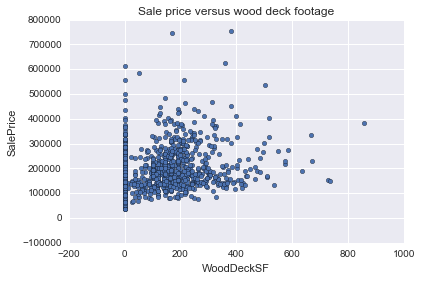

In [159]:
# Feature 66 WoodDeckSF: Wood deck area in square feet
data.plot.scatter(x = "WoodDeckSF", y = "SalePrice")
plt.title("Sale price versus wood deck footage")

## 67. OpenPorchSF

OpenPorchSF is a numeric variable measuring the square footage of a home's open porch area.

As with wooden decks, let's see how many homes in the dataset have open porches (OpenPorchSF > 0).

In [160]:
opporch = data[data.OpenPorchSF > 0]
no_opporch = data[data.OpenPorchSF == 0]
print("Number of homes with an open porch:",len(opporch))
print("Number of homes without an open porch:",len(no_opporch))

Number of homes with an open porch: 804
Number of homes without an open porch: 656


### More than half of the homes in the training set have open porches, making them a popular feature.

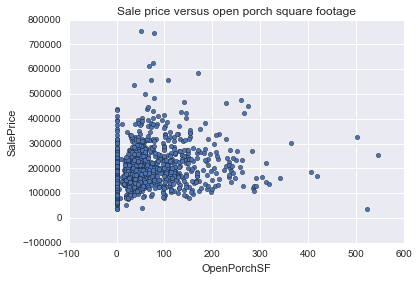

In [161]:
# Feature 67 OpenPorchSF: Open porch area in square feet
data.plot.scatter(x = "OpenPorchSF", y = "SalePrice")
plt.title("Sale price versus open porch square footage")

### While open porches are apparently popular with Iowa homebuyers, it does not appear that there is any relationship between the size of an open porch and the home's sale price.

## 68. EnclosedPorch

EnclosedPorch is a numeric variable measuring the square footage of a home's enclosed porch area.

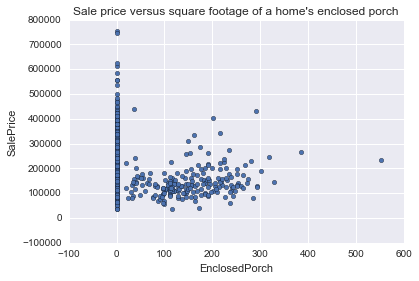

In [162]:
# Feature 68 EnclosedPorch: Enclosed porch area in square feet
data.plot.scatter(x = "EnclosedPorch", y = "SalePrice")
plt.title("Sale price versus square footage of a home's enclosed porch")

### First, there are a lot homes without an enclosed porch (EnclosedPorch == 0).

### Second, there does not appear to be a correlation between the size of an enclosed porch and the home's sale price.

## 69. 3SsnPorch

3SsnPorch is a numeric variable measuring the square footage of a home's three-season porch area.

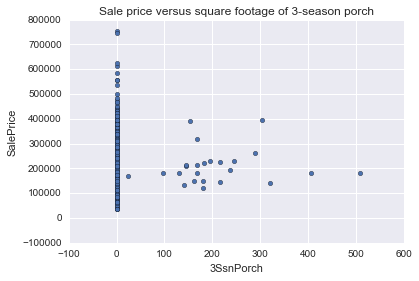

In [163]:
# Feature 69 3SsnPorch: Three season porch area in square feet
data.plot.scatter(x = "3SsnPorch", y = "SalePrice")
plt.title("Sale price versus square footage of 3-season porch")

### Again, few homes have a 3-season porch, and there is no correlation between the size of a 3-season porch and the sale price.

## 70. ScreenPorch

ScreenPorch is a numeric variable measuring the square footage of a home's screen porch.

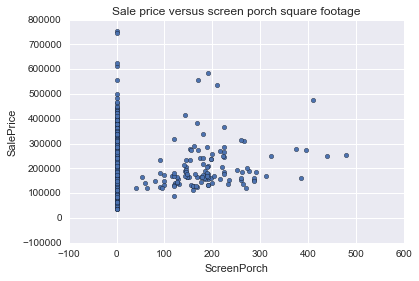

In [164]:
# Feature 70 ScreenPorch: Screen porch area in square feet
data.plot.scatter(x = "ScreenPorch", y = "SalePrice")
plt.title("Sale price versus screen porch square footage")

### Again, most homes do not have a screen porch, and it's hard to see a correlation between sale price and screen porch area in the scatter plot.

## 71. PoolArea

PoolArea is a numeric variable measuring the square footage of a home's pool.

First, let's see how many homes in the training set have a pool (PoolArea > 0).

In [165]:
pool = data[data.PoolArea > 0]
no_pool = data[data.PoolArea == 0]
print("Number of homes with a pool:", len(pool))
print("Number of homes without a pool:",len(no_pool))

Number of homes with a pool: 7
Number of homes without a pool: 1453


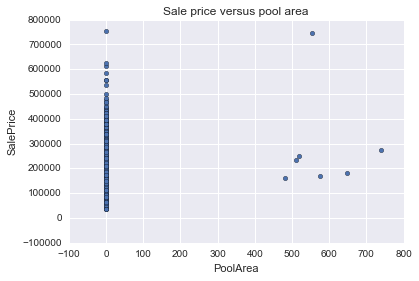

In [166]:
#Feature 71 PoolArea: Pool area in square feet
data.plot.scatter(x = "PoolArea", y = "SalePrice")
plt.title("Sale price versus pool area")

### Pool area does not appear to be a useful variable. Only a handful of homes in the training set have a pool, and of those that do, there is no correlation between the size of the pool and the sale price.

## 72. PoolQC

PoolQC is a categorical variable representing the quality of a home's pool. Given that so few homes in the training set have a pool, I question whether this is a useful variable to include in the model. However, for completeness' sake, it is included in the EDA.

In [167]:
# Feature 72 PoolQC: Pool quality
data.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [168]:
data.groupby("PoolQC").SalePrice.mean()

PoolQC
Ex    490000
Fa    215500
Gd    201990
Name: SalePrice, dtype: int64

## 73. Fence

Fence is a categorical variable representing the quality of a home's fence.

In [169]:
fence_dict = {'GdPrv':'Good privacy','MnPrv':'Minimum privacy','GdWo':'Good wood',\
             'MnWw':'Minimum wood or wire','NA':'No fence'}
frequency_count(fence_dict,'Fence')

,Number
Minimum privacy,157
Good privacy,59
Good wood,54
Minimum wood or wire,11


In [170]:
mean_sale_prices(fence_dict,'Fence')

,Mean Sale Price
Good privacy,178927
Minimum privacy,148751
Good wood,140379
Minimum wood or wire,134286


## 74. MiscFeature

MiscFeature is a categorical variable indicating whether a home has a feature that was not covered in one of the other categories.

In [171]:
misc_dict = {"Elev":'Elevator','Gar2':'2nd garage','Othr':'Other','Shed':'Shed (over 100 sq ft)',\
            'TenC':'Tennis court',"NA":'NA'}
frequency_count(misc_dict, 'MiscFeature')

,Number
Shed (over 100 sq ft),49
Other,2
2nd garage,2
Tennis court,1


In [172]:
mean_sale_prices(misc_dict, 'MiscFeature')

,Mean Sale Price
Tennis court,250000
2nd garage,170750
Shed (over 100 sq ft),151187
Other,94000


## 75. MiscVal

MiscVal is a numeric variable representing the dollar value of a miscellaneous feature. Given that so few homes in the training set have a miscellaneous feature, I am skeptical whether this is worth including in the model.

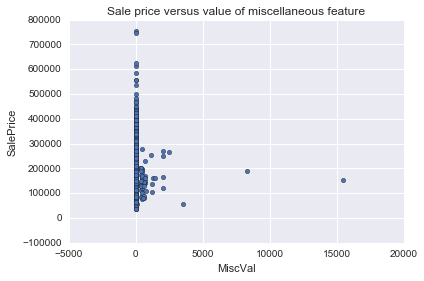

In [173]:
# Feature 75 MiscVal: $Value of miscellaneous feature
data.plot.scatter(x = "MiscVal", y = "SalePrice")
plt.title("Sale price versus value of miscellaneous feature")

### Indeed, the scatter plot does not show much correlation between the value of a miscellaneous feature and the sale price.

## 76. MoSold

MoSold represents the month the home was sold. As shown in the histogram below, the Ames, Iowa real estate market is busiest in the summer (June and July) and slowest in September.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f519748>]], dtype=object)

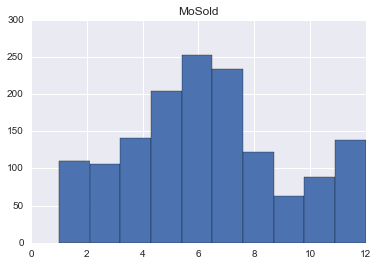

In [174]:
# Feature 76 MoSold: Month Sold (MM)
data.hist("MoSold")

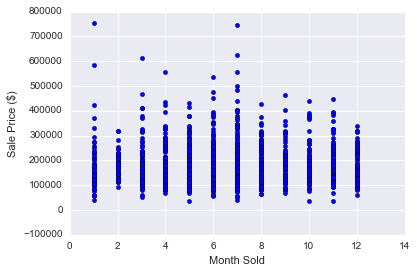

In [175]:
plt.scatter(data.MoSold,data.SalePrice)
plt.xlabel("Month Sold")
plt.ylabel("Sale Price ($)")

### There does not seem to be any obvious patterns in sale prices, with respect to the month the home was sold.

## 77. YrSold

YrSold represents the year the home was sold. All homes in the dataset were sold in the period 2006-2010.

(array([ 314.,    0.,  329.,    0.,    0.,  304.,    0.,  338.,    0.,  175.]),
 array([ 2006. ,  2006.4,  2006.8,  2007.2,  2007.6,  2008. ,  2008.4,
         2008.8,  2009.2,  2009.6,  2010. ]),
 <a list of 10 Patch objects>)

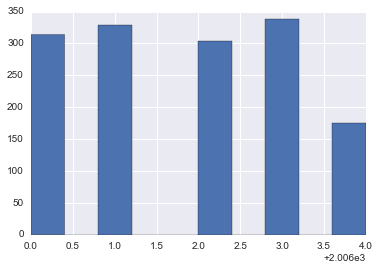

In [176]:
# Feature 77 YrSold: Year Sold (YYYY)
plt.hist(data.YrSold)

In [177]:
print("Mean sale price, grouped by year sold")
year_sold = data.groupby("YrSold")
year_sold.SalePrice.mean()

Mean sale price, grouped by year sold


YrSold
2006    182549
2007    186063
2008    177360
2009    179432
2010    177393
Name: SalePrice, dtype: int64

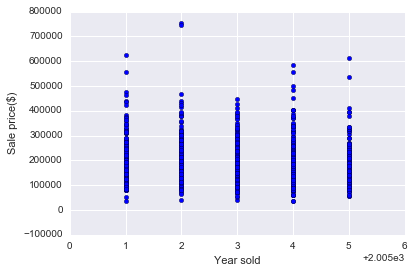

In [178]:
plt.scatter(data.YrSold,data.SalePrice)
plt.xlabel("Year sold")
plt.ylabel("Sale price($)")

## The scatter plot and mean prices for each year indicate that the range of home prices remained fairly stable in Ames, Iowa from 2006 through 2010. This is surprising to me, as I would have expected 2008 to be an awful year for home sales.

## 78. SaleType

SaleType is a categorical variable that represents the type of sale in which the home was sold. Most homes in the training set were sold under a conventional warranty deed.

In [179]:
sale_dict = {'WD':'Warranty Deed - Conventional','CWD':'Warranty Deed - Cash',\
            'VWD':'Warranty Deed - VA Loan','New':'Home just constructed and sold',\
            'COD':'Court Officer Deed/Estate','Con':'Contract 15% Down payment regular terms',\
            'ConLw':'Contract Low Down payment and low interest',\
            'ConLI':'Contract Low Interest','ConLD':'Contract Low Down',"Oth":'Other'}
frequency_count(sale_dict,'SaleType')

,Number
Warranty Deed - Conventional,1267
Home just constructed and sold,122
Court Officer Deed/Estate,43
Contract Low Down,9
Contract Low Interest,5
Contract Low Down payment and low interest,5
Warranty Deed - Cash,4
Other,3
Contract 15% Down payment regular terms,2


In [180]:
mean_sale_prices(sale_dict,'SaleType')

,Mean Sale Price
Home just constructed and sold,274945
Contract 15% Down payment regular terms,269600
Warranty Deed - Cash,210600
Contract Low Interest,200390
Warranty Deed - Conventional,173401
Court Officer Deed/Estate,143973
Contract Low Down payment and low interest,143700
Contract Low Down,138780
Other,119850


## 79. SaleCondition

SaleCondition is a categorical variable representing if any special circumstances were present in the sale. Most homes in the training set were normal sales.

In [181]:
sale_cond_dict = {'Normal':'Normal sale','Abnorml':'Abnormal Sale -  trade, foreclosure, short sale',\
                 'AdjLand':'Adjoining Land Purchase', 'Family':'Sale between family members',\
                 'Alloca':'Allocation - two linked properties with separate deeds, typically condo with a garage unit',\
                 'Partial':'Home was not completed when last assessed (associated with New Homes)'}
frequency_count(sale_cond_dict,'SaleCondition')

,Number
Normal sale,1198
Home was not completed when last assessed (associated with New Homes),125
"Abnormal Sale - trade, foreclosure, short sale",101
Sale between family members,20
"Allocation - two linked properties with separate deeds, typically condo with a garage unit",12
Adjoining Land Purchase,4


In [182]:
mean_sale_prices(sale_cond_dict,'SaleCondition')

,Mean Sale Price
Home was not completed when last assessed (associated with New Homes),272291
Normal sale,175202
"Allocation - two linked properties with separate deeds, typically condo with a garage unit",167377
Sale between family members,149600
"Abnormal Sale - trade, foreclosure, short sale",146526
Adjoining Land Purchase,104125
